# PROJETO: CLASSIFICAÇÃO DE RENDA COM DADOS DO CENSO-PARTE 3

**Objetivo**: A tarefa é prever se renda anual de um indivíduo é superior a $50.000 por ano com base em dados do censo.

**Dataset**: O conjunto de dados para este projeto é originário do [Repositório de Aprendizado de Máquina da UCI](https://archive.ics.uci.edu/ml/datasets/Adult)

**Habilidades Avaliadas em Todo o Projeto**: 
- Manipulação de arquivos .csv
- Limpeza e Tratamento dos dados
- Análise exploratória dos dados
- Técnicas de preprocessamento e transformação dos dados (OneHotEncoder, OrdinalEncoder, StandardScaler, .get_dummies, .qcut)
- Seleção de features
- Ajuste dos hiperparâmetros (GridSearchCV)
- Aplicação de modelos de machine learning para classificação (LogisticRegression, KNeighborsClassifier, RandomForest, DecisionTree, MLPClassifier)
- Métricas de validação (validação cruzada, acurácia, precisão, f1 score, matriz de confusão e relatório de classificação)
- Previsão com a base de teste
- Persistindo o modelo final de machine learning para o disco (joblib)
- Pensamento analítico e conclusão
- Projeção para outros tipos de problemas de negócio

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Padronização](#padronizacao)
- [Seleção de Features](#feat)
- [Modelagem e Avaliação](#modelagem)
- [Tunning dos Modelos](#tunning)
- [Previsão com o Modelo Final](#previsao)
- [Modelo em Disco](#disco)
- [Histórico dos Resultados](#resultados)
- [Conclusão](#conclusao)

**___________________________________________________________________________________________________________________________**

<a id='importacao'></a>
# IMPORTAÇÃO

- Vamos importar as bases finais de treino e teste da parte 2 que contém todas as alterações que foram feitas anteriormente.

In [2]:
# Importação de algumas bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

- **Base de Treino**

In [3]:
# Importação da base de dados
df_treino = pd.read_csv('dataset/dados_limpos/adult_train_parte2.csv')

In [4]:
# Visualizando a base de dados
df_treino.head(3)

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3,1,2174,0,0,1,1,0,2,1,...,0,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,0,1,1,3,3,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


- **Base de Teste**

In [5]:
# Importação da base de dados
df_teste = pd.read_csv('dataset/dados_limpos/adult_test_parte2.csv')

In [6]:
# Visualizando a base de dados
df_teste.head(3)

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,2,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,2,1,0,0,1,1,1,1,2,3,...,0,0,1,0,0,0,0,0,0,1


**___________________________________________________________________________________________________________________________**

<a id='padronizacao'></a>
# PADRONIZAÇÃO
- Redimensionamento dos recursos para criar um "padrão" garantindo que os novos dados tenham **média zero e desvio padrão igual a 1**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler


- A escala padrão de cada valor **x** será dada por:
    - **z = (x - u) / s**, onde:
        - **u:** média das amostras
        - **s:** desvio padrão das amostras


In [7]:
# Antes de fazer a padronização, observe os valores das médias e dos desvios padrão de cada coluna
df_treino.drop('income', axis=1).describe()

,education_num,sex,capital_gain,capital_loss,hours_check,age_check,married_check,workclass_check,occupation_check,native_country_?,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,...,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,1.868703,0.669238,1078.443741,87.368227,1.047853,0.975658,0.460798,1.301380,1.683683,0.017887,...,0.000553,0.000584,0.895995,0.002059,0.000492,0.009558,0.031902,0.095952,0.008329,0.854258
std,1.154085,0.470495,7387.957424,403.101833,0.623255,0.408702,0.498469,0.741244,1.107267,0.132544,...,0.023514,0.024158,0.305271,0.045332,0.022170,0.097300,0.175742,0.294530,0.090884,0.352853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,1.000000,99999.000000,4356.000000,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Importando
from sklearn.preprocessing import StandardScaler

In [9]:
# Instanciando
scaler = StandardScaler()

In [10]:
# Transformando os dados
df_treino[df_treino.drop('income', axis=1).columns] = scaler.fit_transform(df_treino.drop('income', axis=1))

In [11]:
# Analisando os dados transformandos com média igual 0 e desvio padrão igual a 1
df_treino.drop('income', axis=1).describe().round(3)

,education_num,sex,capital_gain,capital_loss,hours_check,age_check,married_check,workclass_check,occupation_check,native_country_?,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,...,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000,32537.000
mean,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.619,-1.422,-0.146,-0.217,-1.681,-2.387,-0.924,-1.756,-1.521,-0.135,...,-0.024,-0.024,-2.935,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,-2.421
25%,-0.753,-1.422,-0.146,-0.217,-0.077,0.060,-0.924,-0.407,-0.617,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
50%,0.114,0.703,-0.146,-0.217,-0.077,0.060,-0.924,-0.407,0.286,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
75%,0.114,0.703,-0.146,-0.217,-0.077,0.060,1.082,-0.407,1.189,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
max,3.580,0.703,13.390,10.590,1.528,2.506,1.082,2.292,1.189,7.410,...,42.504,41.370,0.341,22.014,45.084,10.179,5.509,3.070,10.912,0.413


- **Base de Teste**

In [12]:
# Transformando os dados
df_teste[df_teste.drop('income', axis=1).columns] = scaler.transform(df_teste.drop('income', axis=1))

In [13]:
# Analisando os dados transformandos com média igual 0 e desvio padrão igual a 1
df_teste.drop('income', axis=1).describe().round(3)

,education_num,sex,capital_gain,capital_loss,hours_check,age_check,married_check,workclass_check,occupation_check,native_country_?,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,...,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000,16276.000
mean,-0.006,-0.005,0.001,0.001,-0.003,0.012,-0.010,0.010,-0.005,-0.008,...,0.008,-0.004,0.015,-0.020,-0.003,0.002,-0.014,-0.000,-0.000,0.006
std,0.990,1.002,1.027,1.000,1.001,1.025,0.999,1.015,1.005,0.971,...,1.154,0.918,0.980,0.753,0.935,1.011,0.963,1.000,0.998,0.994
min,-1.619,-1.422,-0.146,-0.217,-1.681,-2.387,-0.924,-1.756,-1.521,-0.135,...,-0.024,-0.024,-2.935,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,-2.421
25%,-0.753,-1.422,-0.146,-0.217,-0.077,0.060,-0.924,-0.407,-0.617,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
50%,0.114,0.703,-0.146,-0.217,-0.077,0.060,-0.924,-0.407,0.286,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
75%,0.114,0.703,-0.146,-0.217,-0.077,0.060,1.082,0.943,1.189,-0.135,...,-0.024,-0.024,0.341,-0.045,-0.022,-0.098,-0.182,-0.326,-0.092,0.413
max,3.580,0.703,13.390,9.136,1.528,2.506,1.082,2.292,1.189,7.410,...,42.504,41.370,0.341,22.014,45.084,10.179,5.509,3.070,10.912,0.413


**___________________________________________________________________________________________________________________________**

<a id='feat'></a>
# SELEÇÃO DE FEATURES
- Seleciona as variáveis ou atributos mais relevantes para o modelo e descartar aquelas que são irrelevantes, redundantes ou ruidosas.
- A seleção dos recursos será baseado no RandomForest que já possue cálculos da importância das features.

In [14]:
# Analisando as colunas que mais se relacionam com a nossa coluna target income
df_treino.corr()['income'].sort_values(ascending=False)

income                                       1.000000
married_check                                0.445202
education_num                                0.352113
occupation_check                             0.330871
hours_check                                  0.255751
capital_gain                                 0.223336
sex                                          0.215969
capital_loss                                 0.150501
workclass_check                              0.143448
age_check                                    0.129568
race_White                                   0.085235
native_country_United-States                 0.034206
native_country_India                         0.020654
native_country_Iran                          0.015114
native_country_Japan                         0.014935
native_country_Taiwan                        0.014012
native_country_Philippines                   0.012288
native_country_Germany                       0.012201
native_country_France       

In [15]:
# Separando a base
X_importance = df_treino.drop('income',axis=1)
y_importance = df_treino['income']

In [16]:
# Importando
from sklearn.ensemble import RandomForestClassifier

# Criando um classificados
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_importance, y_importance)

RandomForestClassifier(random_state=42)

In [17]:
# Analisando a importância das features
feature_imp = pd.Series(clf.feature_importances_,index=X_importance.columns).sort_values(ascending=False)
feature_imp

married_check                                0.241521
capital_gain                                 0.208410
education_num                                0.154498
occupation_check                             0.105642
capital_loss                                 0.078672
hours_check                                  0.053948
sex                                          0.036679
workclass_check                              0.033090
age_check                                    0.026278
native_country_United-States                 0.006470
race_White                                   0.006019
race_Black                                   0.004475
native_country_?                             0.004145
native_country_Mexico                        0.004143
race_Asian-Pac-Islander                      0.003364
native_country_Canada                        0.002260
race_Amer-Indian-Eskimo                      0.001967
native_country_Germany                       0.001963
native_country_Philippines  

In [18]:
# Selecionando as features de maior importância.
features_selecionadas = []

for feature, pontuacao in feature_imp.items():
    if pontuacao >= 0.05:
        print(f'{feature}: {round(pontuacao * 100)}%')
        features_selecionadas.append(feature)

married_check: 24%
capital_gain: 21%
education_num: 15%
occupation_check: 11%
capital_loss: 8%
hours_check: 5%


In [19]:
# Seleciona as colunas que iremos remover com pontuações baixas
remove_cols = [x for x in df_treino.drop('income', axis=1).columns if x not in features_selecionadas]

print('Colunas que serão removidas: ', remove_cols)

Colunas que serão removidas:  ['sex', 'age_check', 'workclass_check', 'native_country_?', 'native_country_Cambodia', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_India', 'native_country_Iran', 'native_country_Ireland', 'native_country_Italy', 'native_country_Jamaica', 'native_country_Japan', 'native_country_Laos', 'native_country_Mexico', 'native_country_Nicaragua', 'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Peru', 'native_country_Philippines', 'native_country_Poland', 'native_country_Portugal', 'native_country_Puerto-Rico', 'native_country_Scotl

## Removendo as colunas com pontuações baixas

- **Base de Treino**

In [20]:
# Removendo as colunas
df_treino.drop(remove_cols, axis=1, inplace=True)

In [21]:
# Visualizando a Base que será avaliada
df_treino.head(3)

,education_num,capital_gain,capital_loss,income,hours_check,married_check,occupation_check
0,0.980269,0.148292,-0.216743,0,-0.076781,-0.924443,-0.617460
1,0.980269,-0.145975,-0.216743,0,-1.681286,1.081733,1.188816
2,-0.752732,-0.145975,-0.216743,0,-0.076781,-0.924443,-1.520599


- **Base de Teste**

In [22]:
# Removendo as colunas
df_teste.drop(remove_cols, axis=1, inplace=True)

In [23]:
# Visualizando a Base que será avaliada
df_teste.head(3)

,education_num,capital_gain,capital_loss,income,hours_check,married_check,occupation_check
0,-0.752732,-0.145975,-0.216743,0,-0.076781,-0.924443,-0.617460
1,-0.752732,-0.145975,-0.216743,0,1.527724,1.081733,-0.617460
2,0.113769,-0.145975,-0.216743,1,-0.076781,1.081733,1.188816


**___________________________________________________________________________________________________________________________**

<a id='modelagem'></a>
# MODELAGEM E AVALIAÇÃO

### Modelos
- Podemos selecionar algoritmos mais avançados dos que vimos nas partes anteriores.
    - **Random Forest**
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier    
    
    - **DecisionTreeClassifier**
        - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    
    - **KNeighborsClassifier (KNN)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    
    - **MLPClassifier (Redes Neurais)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


### Validação Cruzada

- Para fazer essa análise, podemos usar:
    - **CrossValPredict**
        - https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.cross_val_predict.html

### Métricas de Validação

- Para fazer essa análise, podemos usar:
    - **Acurácia**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - **Precisão**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    - **F1 Score**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    - **Matriz de confusão**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    - **Relatório de Classificação**
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

## Função de Avaliação

- Para facilitar nossa análise, vamos criar uma função para criar o modelo, avaliá-lo com a validação cruzada e por fim, esta função retornará o resultado do modelo.

- Vamos executar esta função e sempre que quisermos avaliar nossos modelos, basta chamar a função e inserir como parâmetro o classificador.

In [24]:
# Importando Classificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Importando Validação Cruzada
from sklearn.model_selection import cross_val_predict

# Importando Métricas de Validação
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# Função para avaliação
def avaliar(modelo):
    
    # Separando a base de treino em X e y
    X = df_treino.drop('income',axis=1)
    y = df_treino['income']

    ###################### Modelo
    # Criando o classificador
    clf = modelo
    y_pred = cross_val_predict(clf, X, y, cv=8)    
    
    # Acurácia
    acc = accuracy_score(y, y_pred)
    # Precisão
    pre = precision_score(y, y_pred)
    # F1 Score
    f1 = f1_score(y, y_pred)
    
    print('Accuracy:', acc)
    print('\nPrecision:', pre)
    print('\nF1 Score:', f1)

    # Relatório de classificação
    print('\n', classification_report(y, y_pred))

    # Matriz de confusão
    print('\n', pd.crosstab(y, y_pred, rownames=['Real'], colnames=['Predito'], margins=True).reindex(index=[1, 0], columns=[1, 0], ))
    
    return acc, pre, f1

## Random Forest

In [26]:
# Para Random Forest
acc_rf, pre_rf, f1_rf = avaliar(RandomForestClassifier(random_state=42))

Accuracy: 0.8622798659987092

Precision: 0.7654965211891208

F1 Score: 0.6836122290475182

               precision    recall  f1-score   support

           0       0.89      0.94      0.91     24698
           1       0.77      0.62      0.68      7839

    accuracy                           0.86     32537
   macro avg       0.83      0.78      0.80     32537
weighted avg       0.86      0.86      0.86     32537


 Predito     1      0
Real                
1        4841   2998
0        1483  23215


## Decision Tree

In [27]:
# Para Decision Tree
acc_dt, pre_dt, f1_dt = avaliar(DecisionTreeClassifier(random_state=42))

Accuracy: 0.8629252850600855

Precision: 0.7693288697592858

F1 Score: 0.6839569160997733

               precision    recall  f1-score   support

           0       0.89      0.94      0.91     24698
           1       0.77      0.62      0.68      7839

    accuracy                           0.86     32537
   macro avg       0.83      0.78      0.80     32537
weighted avg       0.86      0.86      0.86     32537


 Predito     1      0
Real                
1        4826   3013
0        1447  23251


## KNeighborsClassifier

In [28]:
# Para KNeighborsClassifier
acc_knn, pre_knn, f1_knn = avaliar(KNeighborsClassifier())

Accuracy: 0.8332667424777945

Precision: 0.6881234413965087

F1 Score: 0.6194317783233954

               precision    recall  f1-score   support

           0       0.87      0.92      0.89     24698
           1       0.69      0.56      0.62      7839

    accuracy                           0.83     32537
   macro avg       0.78      0.74      0.76     32537
weighted avg       0.83      0.83      0.83     32537


 Predito     1      0
Real                
1        4415   3424
0        2001  22697


## MLPClassifier

In [29]:
# Para MLPClassifier
acc_mlp, pre_mlp, f1_mlp = avaliar(MLPClassifier(random_state=42))

Accuracy: 0.8515228816424378

Precision: 0.7388059701492538

F1 Score: 0.6582726179528897

               precision    recall  f1-score   support

           0       0.88      0.93      0.91     24698
           1       0.74      0.59      0.66      7839

    accuracy                           0.85     32537
   macro avg       0.81      0.76      0.78     32537
weighted avg       0.84      0.85      0.85     32537


 Predito     1      0
Real                
1        4653   3186
0        1645  23053


## DataFrame de Comparação

In [30]:
# Cria o dataframe
df_treino_avaliacao = pd.DataFrame(index=['Acurácia', 'Precisão', 'F1_Score'],columns=['Random Forest', 'Decision Tree', 'KNN', 'MLPClassifier']) #cria uma matriz de diferentes níveis

# Insere os valores nas colunas
df_treino_avaliacao['Random Forest'] = [acc_rf, pre_rf, f1_rf]
df_treino_avaliacao['Decision Tree'] = [acc_dt, pre_dt, f1_dt]
df_treino_avaliacao['KNN'] = [acc_knn, pre_knn, f1_knn]
df_treino_avaliacao['MLPClassifier'] = [acc_mlp, pre_mlp, f1_mlp]

df_treino_avaliacao

,Random Forest,Decision Tree,KNN,MLPClassifier
Acurácia,0.862280,0.862925,0.833267,0.851523
Precisão,0.765497,0.769329,0.688123,0.738806
F1_Score,0.683612,0.683957,0.619432,0.658273


**___________________________________________________________________________________________________________________________**

<a id='tunning'></a>
# TUNNING DOS MODELOS


### GridSearchCV

- Vamos usar o **grid_search** para estimar os melhores parâmetros
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Será que é possível melhorar ainda mais o nosso modelo? Vamos tentar fazer isso utilizando o GridSearchCv

In [31]:
# Importando
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## Definindo os parâmetros

In [32]:
# Definindo os parâmetros
parametros_rf = {
    'n_estimators': [100,200,500,1000],  # Número de árvores
    'max_depth': [2,4,6,10,None],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
}

In [33]:
# Definindo os parâmetros
parametros_dt = {
    'criterion': ['gini', 'entropy'],  # Critério de divisão
    'max_depth': [2,4,6,10,None],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10]  # Número mínimo de amostras para dividir um nó
}

In [34]:
# Parâmetros para o GridSearch
parametros_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13], # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Peso aplicado aos vizinhos
    'metric': ['euclidean', 'manhattan']  # Métrica de distância
}

In [35]:
# Definindo os parâmetros
parametros_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Tamanho das camadas ocultas
    'activation': ['tanh', 'relu'],  # Função de ativação
    'solver': ['adam', 'sgd'],  # Algoritmo para otimização
}

## Criando uma função para executar o GridSearchCV

In [36]:
# Importando o datetime para visualizar a hora atual
from datetime import datetime

def hora_atual():
    agora = datetime.now()
    print(str(agora.hour) + ':' + str(agora.minute) + ':' + str(agora.second))

In [37]:
hora_atual()

12:41:31


In [38]:
# Definindo uma função para realizar o gridsearch
def grid(modelo, parametros):
    
    # Separando a base de treino em X e y
    X = df_treino.drop('income',axis=1)
    y = df_treino['income']

    print('Início: ') 
    hora_atual()

    kfold = KFold(n_splits=8, random_state=42, shuffle=True)
    
    grid_search = GridSearchCV(modelo, parametros, scoring='f1', cv=kfold)
    grid_search = grid_search.fit(X, y)

    print('Fim: ')
    hora_atual()
    
    return grid_search

## Executando o GridSearchCV

In [39]:
# Para o RandomForestClassifier
grid_search_rf = grid(RandomForestClassifier(random_state=42), parametros_rf)

Início: 
12:41:31
Fim: 
13:44:11


In [40]:
# Para o DecisionTreeClassifier
grid_search_dt = grid(DecisionTreeClassifier(random_state=42), parametros_dt)

Início: 
13:44:11
Fim: 
13:44:24


In [41]:
# Para o KNN
grid_search_knn = grid(KNeighborsClassifier(), parametros_knn)

Início: 
13:44:24
Fim: 
13:48:46


In [42]:
# Para o MLPClassifier
grid_search_mlp = grid(MLPClassifier(random_state=42), parametros_mlp)

Início: 
13:48:46
Fim: 
14:47:50


- **Verificando os melhores scores**

In [43]:
# Para o RandomForest
rf_best_score = grid_search_rf.best_score_
rf_best_score

0.68284749778713

In [44]:
# Para o DecisionTree
dt_best_score = grid_search_dt.best_score_
dt_best_score

0.6831484123525403

In [45]:
# Para o KNN
knn_best_score = grid_search_knn.best_score_
knn_best_score

0.6576937519574556

In [46]:
# e para o MLPClassifier
mlp_best_score = grid_search_mlp.best_score_
mlp_best_score

0.6649781315197414

- **E os melhores parâmetros**

In [47]:
# Para o RandomForest
grid_search_rf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [48]:
# Para o DecisionTree
grid_search_dt.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

In [49]:
# Para o KNN
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [50]:
# e para o MLPClassifier
grid_search_mlp.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}

**___________________________________________________________________________________________________________________________**

<a id='previsao'></a>
# PREVISÃO COM O MODELO FINAL

- O modelo RandomForest apresentou um maior valor F1 e portanto eerá usado na construção da versão final do modelo.
- A pontuação F1 pode ser interpretada como uma média harmônica da precisão e recall.

In [51]:
# Melhores parâmetros do RandomForest
grid_search_rf.best_estimator_

RandomForestClassifier(random_state=42)

In [52]:
#___________________________________ DIVISÃO EM X E Y __________________________________________
# Separando a base de treino em X e y
X = df_treino.drop('income', axis=1)
y = df_treino['income']

#___________________________________ MODELO __________________________________________
# Criando o classificador
clf_best_rf = RandomForestClassifier(random_state=42)

# Treinando o classificador
clf_best_rf = clf_best_rf.fit(X, y)

In [53]:
# Separando em X e y
X_test = df_teste.drop('income', axis=1)
y_test = df_teste['income']

In [54]:
# Visualizando o X_test
X_test.head()

,education_num,capital_gain,capital_loss,hours_check,married_check,occupation_check
0,-0.752732,-0.145975,-0.216743,-0.076781,-0.924443,-0.617460
1,-0.752732,-0.145975,-0.216743,1.527724,1.081733,-0.617460
2,0.113769,-0.145975,-0.216743,-0.076781,1.081733,1.188816
3,0.113769,0.894653,-0.216743,-0.076781,1.081733,-0.617460
4,0.113769,-0.145975,-0.216743,-1.681286,-0.924443,-1.520599


In [55]:
# Fazendo a previsão
y_pred = clf_best_rf.predict(X_test)

In [56]:
#___________________________________ AVALIAÇÃO __________________________________________
# Acurácia
acc = accuracy_score(y_test, y_pred)
# Precisão
pre = precision_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)

print('Accuracy:', acc)
print('\nPrecision:', pre)
print('\nF1 Score:', f1)

# Relatório de classificação
print('\n', classification_report(y_test, y_pred))

# Matriz de confusão
print('\n', pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True).reindex(index=[1, 0], columns=[1, 0], ))

Accuracy: 0.8636028508232981

Precision: 0.7681398416886543

F1 Score: 0.677231753416691

               precision    recall  f1-score   support

           0       0.89      0.94      0.91     12430
           1       0.77      0.61      0.68      3846

    accuracy                           0.86     16276
   macro avg       0.83      0.77      0.80     16276
weighted avg       0.86      0.86      0.86     16276


 Predito     1      0
Real                
1        2329   1517
0         703  11727


**___________________________________________________________________________________________________________________________**

<a id='disco'></a>
# MODELO EM DISCO

- Persistindo o modelo de Machine Learning para o disco.

In [57]:
# Importando o joblib
import joblib

In [58]:
# Persistindo o melhor modelo em disco.
joblib.dump(clf_best_rf, 'modelo_final_rf.joblib')

['modelo_final_rf.joblib']

- Carregando o modelo a partir do disco para a memória.

In [59]:
model = joblib.load('modelo_final_rf.joblib')
model

RandomForestClassifier(random_state=42)

**___________________________________________________________________________________________________________________________**

<a id='resultados'></a>
# HISTÓRICO DOS RESULTADOS

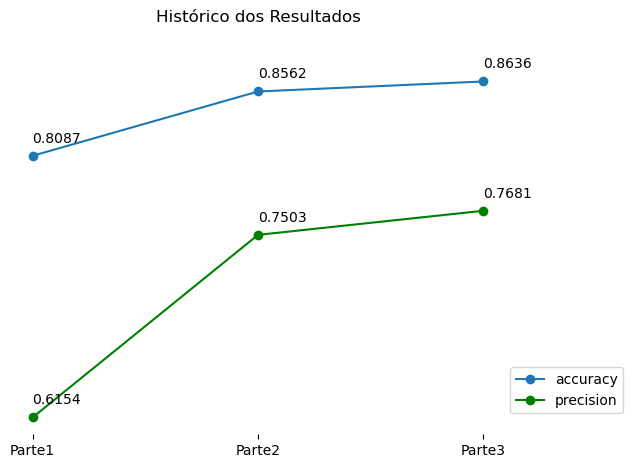

In [60]:
# Gráfico do histórico dos resultados
x = [1, 2, 3]
y_accuracy = [0.8087, 0.8562, 0.8636]
y_precision = [0.6154, 0.7503, 0.7681]

plt.plot(x, y_accuracy, '-o', label='accuracy')
plt.plot(x, y_precision, '-o', color='green', label='precision')

plt.legend(bbox_to_anchor=(0.75, 0.1, 0.5, 0.1))
plt.xticks(x, ['Parte1', 'Parte2', 'Parte3'])
plt.yticks([])

# Deixar apenas o eixo x visível  
plt.gca().spines['left'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)

for i, y_valor in enumerate(y_accuracy):
    plt.annotate(y_valor, [x[i], y_accuracy[i]+0.01])
    
for i, y_valor in enumerate(y_precision):
    plt.annotate(y_valor, [x[i], y_precision[i]+0.01])

plt.title('Histórico dos Resultados\n\n')

plt.show()

**___________________________________________________________________________________________________________________________**

<a id='conclusao'></a>
# CONCLUSÃO

- Na primeira parte do nosso projeto, executamos o modelo mais simples possível com apenas as variáveis numéricas **(`age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` e `hours_per_week`)** sem nunhum tratamento prévio. Com este cenário, obtivemos os seguintes resultados utilizando o Random Forest:
    - Accuracy: 0.8087
    - Precision: 0.6154
---
- Na segunda parte, fizemos um trabalho de análise e tratamento mais profundo e detalhado para entender melhor os atributos e seus relacionamentos. Após todos os tratamentos feitos, utilizamos as colunas **(`education_num`, `sex`, `capital_gain`, `capital_loss`, `hours_check`, `age_check`, `married_check`, `workclass_check`, `occupation_check`, `country_check` e `race`)** devidamente tratadas para numéricas. Com isso, o melhor resultado foi utilizando o modelo Random Forest:
    - Accuracy: 0.8562
    - Precision: 0.7503
---
- Na terceira e última parte do projeto, fizemos um pré-processamento para padronizar os dados, selecionamos as melhores features, pois features que não possuem tanta relevância podem atrapalhar o modelo e por fim, o tunning do modelo com o GridSearchCV afim de encontrar os melhores parâmetros e com isso ter um melhor resultado. 
- Além disso, nesta parte foram utilizados outros modelos como o DecisionTree e o MLPClassifier. 
- O melhor resultado foi utilizando o modelo Random Forest
- As colunas **`education_num`,  `capital_gain`, , `capital_loss`, `hours_check`, `married_check` e `occupation_check`** foram selecionadas como as melhores para predizer se a renda anual de uma pessoa é maior que 50k.
- Perceba que todas as outras colunas foram removidas e mesmo assim tivemos resultados semelhantes e até melhores que os modelo da parte 2.
    - Accuracy: 0.8636
    - Precision: 0.7681
    - F1 Score: 0.6772
---

# Problemas de Negócio
O objetivo deste projeto é prever se a renda anual de um indivíduo excede 50 mil dólares por ano, com base em dados do censo, também conhecidos como o conjunto de dados "Census Income".  

Realizar essa previsão de renda tem grande relevância estratégica e prática, pois pode fornecer insights valiosos que auxiliam na tomada de decisões em diversos setores da sociedade.  

Embora este projeto não tenha um problema de negócio previamente definido, é possível identificar cenários em que essa análise seria aplicável, como por exemplo, no estudo da desigualdade socioeconômica e em serviços financeiros.

Nos tópicos seguintes, detalharemos esses exemplos e, com base nos resultados, selecionaremos o modelo de machine learning mais adequado para atender ao propósito do projeto.

---
### Exemplo 1: Análise de desigualdade socioeconômica

A previsão ajuda a entender os fatores que contribuem para a desigualdade de renda, como educação, ocupação, idade e estado civil, permitindo a análise das disparidades socioeconômicas.
 
Considerando este problema de negócio, estamos mais interessados em entender quais características mais contribuem para a desigualdade de renda, ou seja, a relação entre os atributos X com a variável alvo Y.

Como os modelos Random Forest e Decision Tree obtiveram resultados próximos, entender o problema de negócio é essencial para decidir qual modelo usar. Se o foco do problema é a análise de desigualdade socioeconômica, o modelo Decision Tree seria o mais indicado. pois é um modelo mais interpretável, intuitivo, simples e fácil de implementar e transmitir os resultados para especialistas não técnicos. 

Podemos listar algumas vantagens de se utilizar o Decision Tree para este caso:

>**1. Transparência:**
>- A análise de desigualdade socioeconômica geralmente envolve a comunicação dos resultados para diferentes stakeholders, como formuladores de políticas, pesquisadores e o público em geral. Um modelo interpretável facilita essa comunicação, pois as decisões tomadas pelo modelo podem ser claramente explicadas, mostrando como variáveis como educação, ocupação e estado civil influenciam os resultados.
>
>**2. Tomada de decisão informada:**
>- Políticas voltadas para a redução da desigualdade socioeconômica precisam ser baseadas em decisões bem justificadas. O Decision Tree oferece uma visão clara de como as variáveis são usadas no processo de tomada de decisão, permitindo que os insights gerados sejam mais confiáveis e compreensíveis.
>
>**3. Simplicidade de implementação:**
>- A simplicidade do Decision Tree também facilita sua implementação em projetos que demandam explicações frequentes. Quando você precisa ajustar o modelo ou adaptá-lo a novos dados, o processo é mais direto com um modelo mais simples e menos sensível a variáveis complexas.
>
>**4. Explicabilidade local:**
>- Embora o Random Forest tenha mais flexibilidade e possa capturar padrões mais complexos, a explicabilidade local de um modelo como Decision Tree, que permite ver as regras de decisão diretamente, é crucial para entender fatores específicos que afetam indivíduos ou grupos com rendas diferentes.

Portanto, considerando que a explicabilidade é um fator importante para a análise de desigualdade socioeconômica e comunicação dos resultados, o Decision Tree seria o modelo mais adequado.

 ---
### Exemplo 2: Serviços financeiros

Bancos e instituições financeiras podem utilizar esses modelos para avaliar o perfil de renda dos clientes, ajustando limites de crédito, taxas de empréstimo e ofertas de produtos financeiros de acordo com o risco de inadimplência.

Para o cenário de serviços financeiros, onde o objetivo é avaliar o perfil de renda dos clientes, ajustar limites de crédito e taxas de empréstimo, o Random Forest seria o modelo preferido, e aqui estão as razões para isso:

>**1. Maior precisão e robustez:**
>- O setor financeiro envolve decisões críticas, onde a precisão no cálculo do risco é fundamental para evitar inadimplência e perdas financeiras. O Random Forest tende a ser mais robusto e oferecer maior acurácia, pois combina os resultados de várias árvores de decisão, reduzindo o risco de overfitting e capturando padrões complexos nos dados. Isso é especialmente importante quando se lida com grandes volumes de dados e múltiplas variáveis, como histórico de crédito, renda, idade e outras informações demográficas e financeiras.
>
>**2. Resistência a ruídos e overfitting:**
>- O Random Forest é menos sensível a ruídos e pequenas variações nos dados, algo comum em dados financeiros. Essa robustez é crucial para garantir que o modelo não se ajuste demais aos dados de treinamento, o que pode ocorrer facilmente com uma Decision Tree, especialmente em cenários com variáveis ruidosas.
>
>**3. Capacidade de capturar interações complexas:**
>- Clientes bancários podem apresentar perfis muito distintos e interações complexas entre variáveis (por exemplo, histórico de crédito combinado com renda e idade). O Random Forest, por ser um modelo mais flexível, consegue capturar essas interações de forma eficaz, fornecendo previsões mais precisas para diferentes perfis de clientes.
>
>**4. Escalabilidade:**
>- Em serviços financeiros, é comum trabalhar com grandes volumes de dados. O Random Forest lida melhor com esse tipo de situação, mantendo um bom desempenho e consistência, mesmo quando aplicado a grandes bases de dados. Isso é particularmente importante quando bancos processam milhares ou milhões de clientes simultaneamente.
>
>**5. Importância das variáveis:**
>- Embora a Decision Tree seja mais interpretável, o Random Forest ainda fornece métricas de importância das variáveis, permitindo que bancos e instituições financeiras identifiquem os fatores mais influentes nas previsões de renda e risco de crédito, sem sacrificar a performance do modelo.

No caso de serviços financeiros, onde a precisão, a robustez e a capacidade de lidar com grandes volumes de dados são cruciais, o Random Forest seria a melhor escolha. Embora seja menos interpretável que o Decision Tree, o Random Forest oferece uma combinação superior de flexibilidade e desempenho, o que é vital para evitar inadimplência e otimizar as decisões financeiras.

---
# Gráfico Acurácia x Interpretabilidade
Abaixo, podemos ver um gráfico que analisa a acurácia e a interpretabilidade de diferentes modelos. Podemos ver que o modelo Decision Tree possui boa acurácia e alta interpretabilidade. Já o modelo Random Forest possui baixa interpretabilidade e alta acurácia.

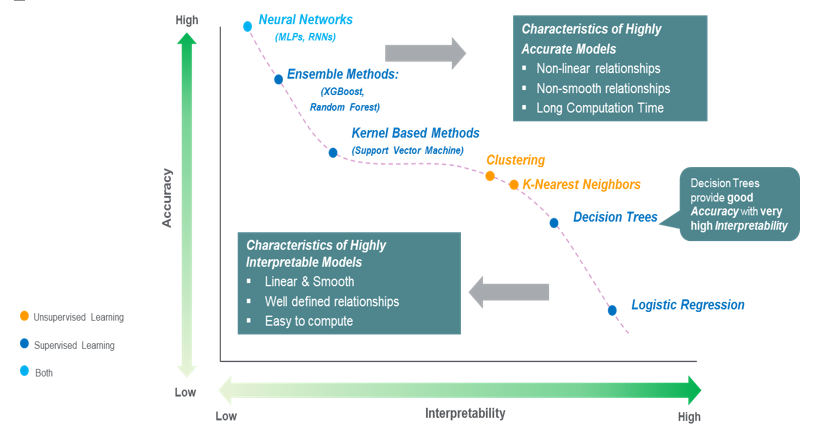

---
# Análise das Métricas de Avaliação e da Matriz de Confusão

Ao analisar as métricas de validação, é essencial considerar o problema de negócio. Por exemplo, no cenário de serviços financeiros, onde o objetivo é avaliar o perfil de renda para ajustar limites de crédito e taxas de empréstimo, a precisão no cálculo do risco é crucial para evitar inadimplência e perdas financeiras.  

Um **falso positivo (FP)**, onde o modelo prevê que uma pessoa ganha mais de 50k quando na verdade ganha menos, pode levar à concessão equivocada de crédito, aumentando o risco de inadimplência. Por isso, reduzir os FP é fundamental neste caso, e a métrica **Precision** se torna prioritária. A métrica Precision é calculada como a razão entre verdadeiros positivos (TP) e o total de positivos previstos (TP + FP), indicando o percentual de acertos nas classificações positivas. No projeto, o modelo previu 3032 pessoas com renda acima de 50k, mas apenas 2329 (TP) realmente possuem essa renda, resultando em uma precisão de **76,81%**.  

Por outro lado, no cenário de captação de clientes, onde o foco é identificar potenciais clientes com renda superior a 50k, um **falso negativo (FN)** — prever que alguém ganha menos de 50k quando na verdade ganha mais — pode levar à perda de oportunidades. Nesse caso, teriamos que diminuir a quantidade de valores FALSO NEGATIVO (FN) e por isso a métrica **Recall** é mais relevante. Esta métrica é calculada como a razão entre positivos verdadeiros (TP) e o total de pessoas que realmente possuem renda superior, que é a soma de positivos verdadeiros (TP) e falsos negativos (FN), indicando o percentual de acertos entre aqueles que realmente possuem renda superior a 50k. No projeto, de 3846 pessoas com renda superior a 50k, o modelo identificou corretamente 2329 (TP), resultando em um recall de **60,55%**.  

Portanto, a escolha da métrica ideal depende diretamente do objetivo do negócio: **Precision** para minimizar riscos financeiros ou **Recall** para maximizar captação de clientes.

- Fórmula para o cálculo 'Precision'
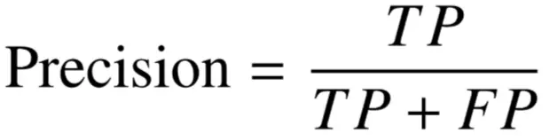

- Fórmula para o cálculo 'Recall'
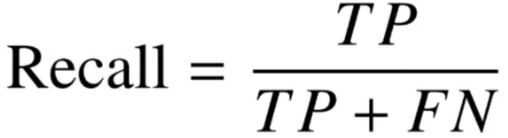

- Matriz de confusão do nosso modelo final

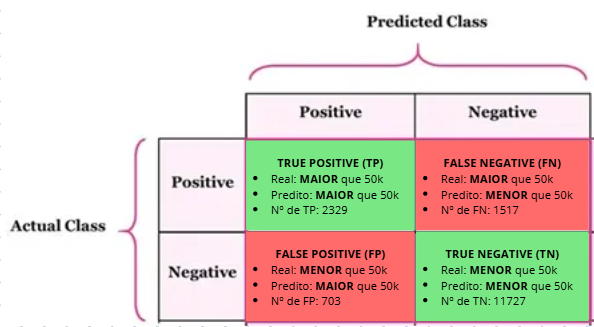

- Relatório de classificação

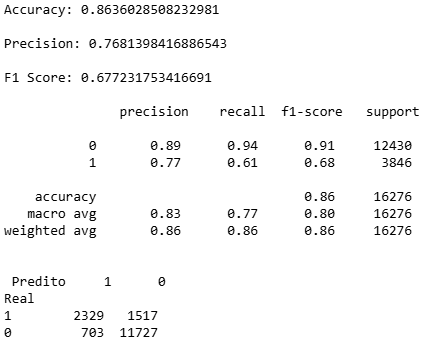


O modelo final apresentou uma **precisão de 76,81%** para a **classe 1**. No entanto, a métrica **Recall** foi menor, atingindo **60,55%**, o que significa que o modelo está errando mais ao prever que uma pessoa ganha menos de 50k quando, na verdade, ela ganha mais.  

Durante os testes, ao utilizar **Precision** como parâmetro de **scoring** no **GridSearchCV**, conseguimos aumentar consideravelmente a precisão para a classe 1, mas isso resultou em uma queda significativa no Recall. Por esse motivo, optamos por utilizar a **métrica F1** no **GridSearchCV**, pois ela representa uma **média harmônica** entre precisão e recall, oferecendo uma avaliação mais equilibrada entre as duas métricas.  

Ter uma precisão muito alta acompanhada de um Recall muito baixo indica um desequilíbrio no modelo. Embora seja essencial evitar inadimplências, uma baixa captação de clientes também prejudica o negócio. Portanto, ao escolher a **métrica F1**, conseguimos balancear a importância de ambos os aspectos, garantindo um desempenho mais adequado às necessidades do projeto.


- Fórmula para o cálculo 'F1 Score'
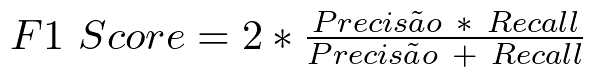


---
# Estudo dos Atributos

- Utilizando a mesma **pesquisa simples** feita com o auxílio do Chat-GPT, podemos entender melhor os possíveis motivos das features terem sido selecionadas.

>**Education_num:**
>Nível educacional é um forte preditor de renda. Pessoas com maior escolaridade têm mais chances de ocupar cargos com melhores salários.

>**Capital-gain:**
>Ganhos de capital indicam rendimentos de investimentos, sugerindo maior riqueza e, consequentemente, maior probabilidade de ganhar mais de 50 mil por ano.

>**Capital-loss:**
>Embora o capital-gain já tenha se mostrado relevante, a perda de capital (capital-loss) também pode ter uma relação com a renda, embora de maneira mais indireta. Indivíduos que reportam perdas de capital podem ser aqueles que investem em mercados financeiros ou imóveis, o que pode indicar um perfil de maior risco ou rendimentos flutuantes. Essa variável pode ser relevante quando analisada em conjunto com capital-gain.

>**hours_check:**
>O número de horas trabalhadas por semana também tem um impacto direto na renda. Profissionais que trabalham mais horas tendem a ganhar mais, seja por carga horária maior ou por cargos que demandam mais tempo, como em posições de alta responsabilidade ou executivas.

>**Married_check**:
>O estado civil afeta a renda, já que pessoas casadas tendem a ter maior estabilidade financeira e maiores rendimentos devido a fatores como combinação de salários e incentivos fiscais.

>**Occupation_check:**
> O tipo de ocupação impacta diretamente os salários. Profissões em setores como tecnologia ou finanças costumam pagar mais do que setores de serviços ou trabalho manual.

